# Signalized Intersections

In this dataset, we will explore data regarding the signalized intersections of Pittsburgh. 

### What is a signalized intersection?
A signalized intersection is a traffic intersection outfitted with different pieces of technology that help to control the flows of traffic present. An example of this is a fixed pedestrian signalized intersection, wherein the timing between the traffic lights and the crosswalk signs are active 24/7 with fixed intervals, therefore having no need for a button of any sort. 

### Why do they matter?

For our purpose of finding the best neighborhood based on the safety around cars, they matter a lot! The more signalized intersections a neighborhood has, the more controlled conflicting flows of traffic are. This means that the likelihood of crashes is decreased, meaning pedestrians/non-car users are safer! The submetric presented in this dataset is therefore the, _**"level of technological progression in traffic control"**_.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

signalInter = pd.read_csv("SignalizedIntersections.csv")

<Axes: >

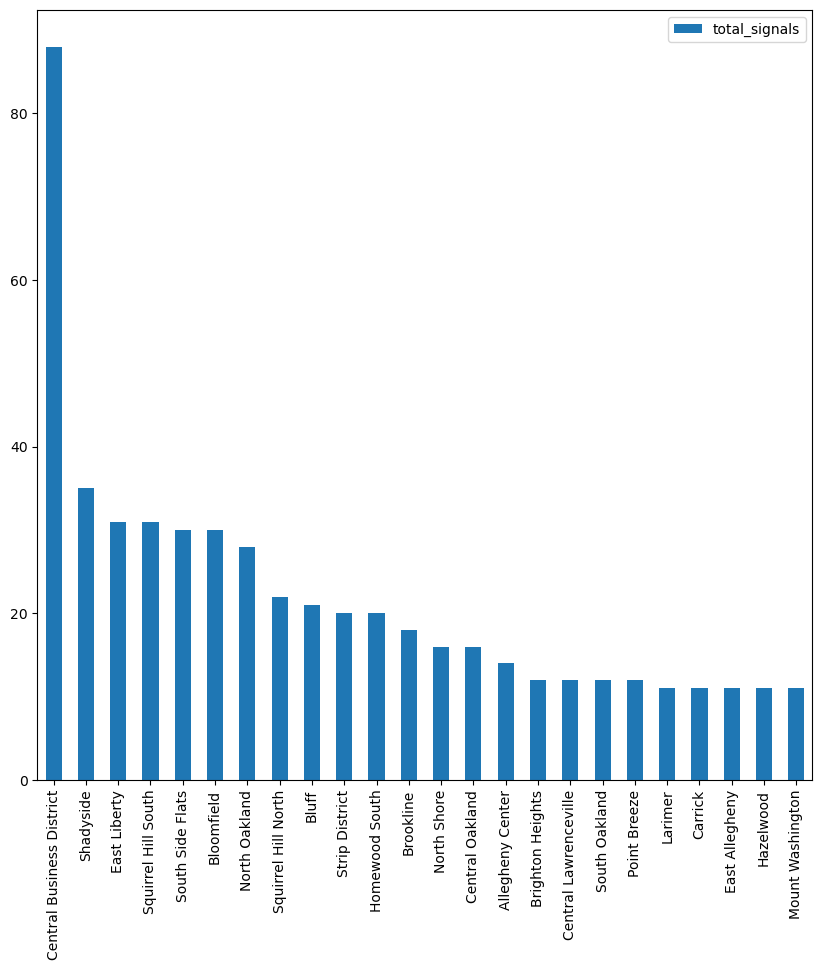

In [13]:
#count the amount of signalized intersections per neighborhood

neighborhoodDict = dict()

for value, row in signalInter.iterrows():
    neighborhood = row["neighborhood"]
    if neighborhood in neighborhoodDict and pd.notna(neighborhood):
        neighborhoodDict[neighborhood] += 1
    else:
        neighborhoodDict[neighborhood] = 1

dataFrameSums = pd.Series(neighborhoodDict)

dataFrameSums= {'total_signals':dataFrameSums}
dataFrameSums=pd.DataFrame(dataFrameSums)

reduced = dataFrameSums[dataFrameSums["total_signals"]>10]
increasingSorted = reduced.sort_values(by = 'total_signals', ascending = False)
#plot a bar graph

increasingSorted.plot.bar(figsize=(10, 10))

The best way to determine which neighborhood has the best level of technological progression is to count which neighborhood has the most signalized intersections. The graph above displays the top 20 neighborhoods with the most signalized intersections in descending order. The neighborhood with the most signalized intersections turned out to be the "Central Business District". 

<Axes: >

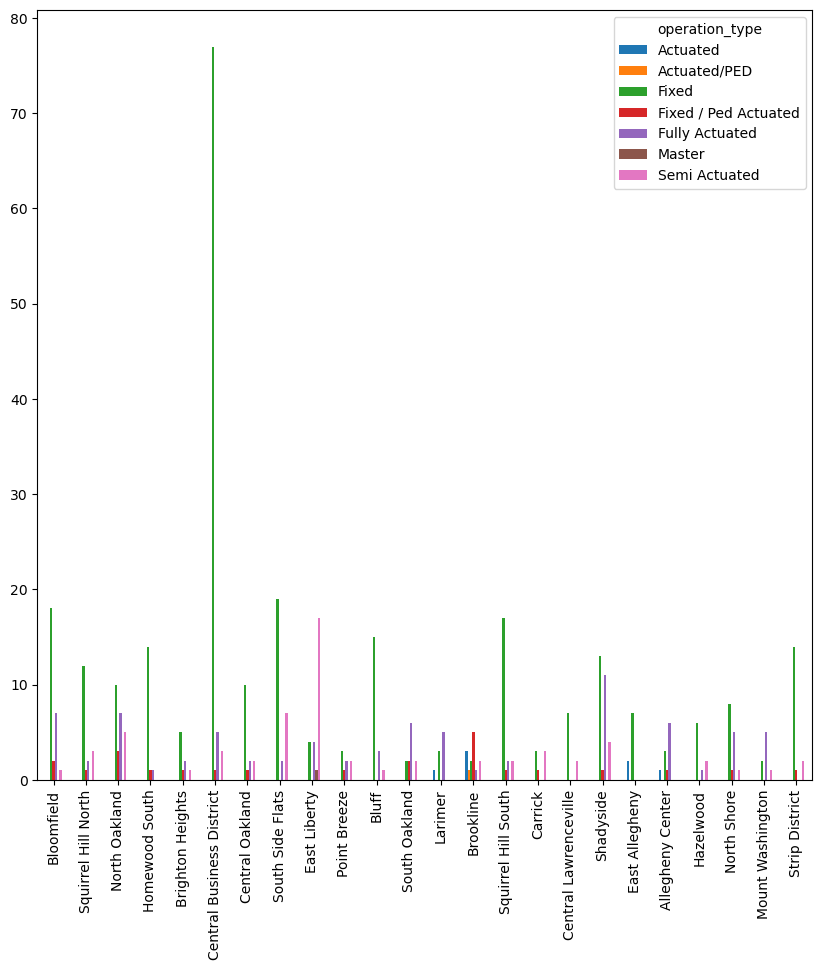

In [14]:
neighborhoodStats = signalInter.pivot_table(index="neighborhood", columns="operation_type", values = "id",aggfunc = "count", fill_value=0)
neighborhoodStats = neighborhoodStats.iloc[:, :7]
bestHoodsSorted = neighborhoodStats.loc[reduced.index]
bestHoodsSorted.plot.bar(figsize=(10, 10))


Furthermore, to add on to how progressive the technology in a neighborhoods traffic control is, we should look at how many of each type of signalized intersection each neighborhood has. We only want to look at the neighborhoods that have already been narrowed down as having the most intersections, because that's the most important to the submetric. The graph above has the top 20 neighborhoods with the most signalized intersections on the x-axis, with multiple bars per neighborhood showcasing how many of each type of intersection they have. The type of intersection is showcased by the different colors and the key in the top right corner.

By doing this, we can see that most neighborhoods have the majority of their signalized intersections working on a "fixed" model. A fixed intersection is an intersection that changes traffic flows based on a pre-timed signals. They are heavily recommended for busy urban areas, making them great for Pittsburgh!

<Axes: ylabel='Central Business District'>

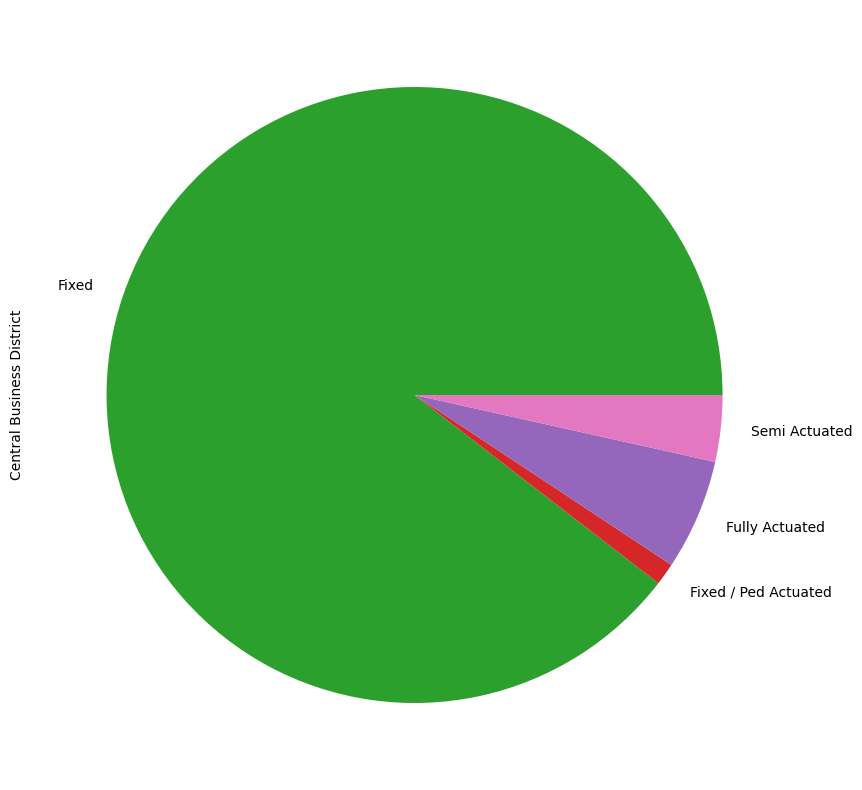

In [15]:
bestNeighborhood = bestHoodsSorted.loc['Central Business District']
bestNeighborhood.plot.pie(figsize=(10, 10))

Here we can see a close up of the distrbution in signalized intersection types in the Central Business District neighborhood. We inspect the central business district because it 1. has the greatest signalized intersections and 2. has the greatest amount of fixed intersections, which are recommended for urband areas. The pie chart shows that the neighborhood's fixed intersections make up more than 75% of its total signalized intersections.

## The neighborhood with the highest level of technological progression in traffic control is the central business district.

This is based off the neighborhoods amount of signalized intersections, types of signalized intersections present, and distribution of the types of intersection present.